In [1]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# 파일 불러오기

In [2]:
data_merge = pd.read_csv("C:\\Users\\asus\\BigContest\\files\\data_preprocessing\\ver_3_house_total_merge_data.csv")
data_merge

,base_date,emd_cd,korean,long_term_frgn,short_term_frgn,resident,card_cnt,card_amt,waste_cnt,total_house,distancing,waste_amt
0,2019-11-30,50110250,7.321788e+06,469689.3527,129161.4006,25149,267.380645,9586590.265,620,170431,0.000000,2279550
1,2019-12-31,50110250,6.915173e+06,482920.2385,122124.6609,25080,266.814465,9621756.255,8178,170431,0.000000,31493650
2,2020-01-31,50110250,7.476137e+06,587299.9640,112758.3034,25076,257.604430,9648302.136,13042,8466,0.000000,49632850
3,2020-02-29,50110250,5.561978e+06,559439.3959,60252.7989,25021,249.621160,8760701.457,12264,8466,0.000000,46197050
4,2020-03-31,50110250,6.094369e+06,714445.0812,29661.4429,24942,261.877023,8979547.945,14316,8466,0.000000,52561750
...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2021-02-28,50130620,4.321265e+06,109325.4866,280.6159,4173,65.216000,2463788.712,4563,1310,1.750000,15566250
1630,2021-03-31,50130620,4.744309e+06,118258.8891,1475.8404,4178,67.700000,2572585.700,4920,1310,1.500000,17300600
1631,2021-04-30,50130620,5.236706e+06,129227.7480,1283.0997,4161,68.642336,2473174.901,5256,1310,1.500000,17646850
1632,2021-05-31,50130620,5.805413e+06,144213.2650,1212.2652,4178,69.333333,2864493.949,6346,1310,1.532258,19494750


# xgboost 모델링

In [3]:
X_features = data_merge.loc[:, ['korean', 'long_term_frgn', 'short_term_frgn', 'resident', 
                                'card_cnt', 'card_amt', 'waste_cnt',
                                'total_house', 'distancing']]
y_label = data_merge.loc[:, 'waste_amt']

In [4]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(1307, 9) (327, 9)


In [5]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [6]:
# max_depth = 3, 학습률은 0.1, 목적함수(objective)는 reg:linear(회귀)
# 오류함수의 평가성능지표는 rmse
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 7,
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmsle',
         'early_stoppings' : 100 }
num_rounds = 1000

In [7]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[14:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmsle:2.31352	eval-rmsle:2.31704
[1]	train-rmsle:1.67142	eval-rmsle:1.67139
[2]	train-rmsle:1.31505	eval-rmsle:1.31388
[3]	train-rmsle:1.07732	eval-rmsle:1.07724
[4]	train-rmsle:0.90314	eval-rmsle:0.90456
[5]	train-rmsle:0.76827	eval-rmsle:0.77035
[6]	train-rmsle:0.66084	eval-rmsle:0.66311
[7]	train-rmsle:0.57424	eval-rmsle:0.57808
[8]	train-rmsle:0.50215	eval-rmsle:0.50775
[9]	train-rmsle:0.44180	eval-rmsle:0.4489

[172]	train-rmsle:0.02210	eval-rmsle:0.08247
[173]	train-rmsle:0.02210	eval-rmsle:0.08254
[174]	train-rmsle:0.02206	eval-rmsle:0.08254
[175]	train-rmsle:0.02201	eval-rmsle:0.08256
[176]	train-rmsle:0.02190	eval-rmsle:0.08258
[177]	train-rmsle:0.02165	eval-rmsle:0.08253
[178]	train-rmsle:0.02158	eval-rmsle:0.08256
[179]	train-rmsle:0.02157	eval-rmsle:0.08258
[180]	train-rmsle:0.02147	eval-rmsle:0.08252
[181]	train-rmsle:0.02145	eval-rmsle:0.08252
[182]	train-rmsle:0.02141	eval-rmsle:0.08256
[183]	train-rmsle:0.02123	eval-rmsle:0.08254
[184]	train-rmsle:0.02114	eval-rmsle:0.08255
[185]	train-rmsle:0.02104	eval-rmsle:0.08258
[186]	train-rmsle:0.02100	eval-rmsle:0.08255
[187]	train-rmsle:0.02080	eval-rmsle:0.08255
[188]	train-rmsle:0.02071	eval-rmsle:0.08255
[189]	train-rmsle:0.02066	eval-rmsle:0.08259
[190]	train-rmsle:0.02064	eval-rmsle:0.08258
[191]	train-rmsle:0.02028	eval-rmsle:0.08260
[192]	train-rmsle:0.02028	eval-rmsle:0.08256
[193]	train-rmsle:0.02022	eval-rmsle:0.08250
[194]	trai

[355]	train-rmsle:0.00794	eval-rmsle:0.08269
[356]	train-rmsle:0.00795	eval-rmsle:0.08269
[357]	train-rmsle:0.00794	eval-rmsle:0.08268
[358]	train-rmsle:0.00794	eval-rmsle:0.08268
[359]	train-rmsle:0.00789	eval-rmsle:0.08269
[360]	train-rmsle:0.00788	eval-rmsle:0.08269
[361]	train-rmsle:0.00778	eval-rmsle:0.08269
[362]	train-rmsle:0.00775	eval-rmsle:0.08270
[363]	train-rmsle:0.00772	eval-rmsle:0.08271
[364]	train-rmsle:0.00766	eval-rmsle:0.08271
[365]	train-rmsle:0.00762	eval-rmsle:0.08272
[366]	train-rmsle:0.00763	eval-rmsle:0.08272
[367]	train-rmsle:0.00760	eval-rmsle:0.08273
[368]	train-rmsle:0.00753	eval-rmsle:0.08275
[369]	train-rmsle:0.00749	eval-rmsle:0.08276
[370]	train-rmsle:0.00747	eval-rmsle:0.08276
[371]	train-rmsle:0.00747	eval-rmsle:0.08277
[372]	train-rmsle:0.00746	eval-rmsle:0.08277
[373]	train-rmsle:0.00743	eval-rmsle:0.08278
[374]	train-rmsle:0.00740	eval-rmsle:0.08279
[375]	train-rmsle:0.00723	eval-rmsle:0.08280
[376]	train-rmsle:0.00720	eval-rmsle:0.08279
[377]	trai

[538]	train-rmsle:0.00295	eval-rmsle:0.08278
[539]	train-rmsle:0.00293	eval-rmsle:0.08278
[540]	train-rmsle:0.00292	eval-rmsle:0.08279
[541]	train-rmsle:0.00291	eval-rmsle:0.08279
[542]	train-rmsle:0.00290	eval-rmsle:0.08279
[543]	train-rmsle:0.00289	eval-rmsle:0.08278
[544]	train-rmsle:0.00287	eval-rmsle:0.08278
[545]	train-rmsle:0.00287	eval-rmsle:0.08278
[546]	train-rmsle:0.00286	eval-rmsle:0.08277
[547]	train-rmsle:0.00285	eval-rmsle:0.08277
[548]	train-rmsle:0.00272	eval-rmsle:0.08278
[549]	train-rmsle:0.00271	eval-rmsle:0.08278
[550]	train-rmsle:0.00271	eval-rmsle:0.08278
[551]	train-rmsle:0.00270	eval-rmsle:0.08276
[552]	train-rmsle:0.00269	eval-rmsle:0.08277
[553]	train-rmsle:0.00269	eval-rmsle:0.08277
[554]	train-rmsle:0.00268	eval-rmsle:0.08277
[555]	train-rmsle:0.00267	eval-rmsle:0.08277
[556]	train-rmsle:0.00265	eval-rmsle:0.08277
[557]	train-rmsle:0.00265	eval-rmsle:0.08276
[558]	train-rmsle:0.00264	eval-rmsle:0.08276
[559]	train-rmsle:0.00263	eval-rmsle:0.08276
[560]	trai

[721]	train-rmsle:0.00111	eval-rmsle:0.08278
[722]	train-rmsle:0.00110	eval-rmsle:0.08278
[723]	train-rmsle:0.00110	eval-rmsle:0.08278
[724]	train-rmsle:0.00110	eval-rmsle:0.08278
[725]	train-rmsle:0.00108	eval-rmsle:0.08278
[726]	train-rmsle:0.00107	eval-rmsle:0.08277
[727]	train-rmsle:0.00106	eval-rmsle:0.08278
[728]	train-rmsle:0.00106	eval-rmsle:0.08277
[729]	train-rmsle:0.00106	eval-rmsle:0.08277
[730]	train-rmsle:0.00104	eval-rmsle:0.08277
[731]	train-rmsle:0.00104	eval-rmsle:0.08278
[732]	train-rmsle:0.00103	eval-rmsle:0.08278
[733]	train-rmsle:0.00103	eval-rmsle:0.08277
[734]	train-rmsle:0.00102	eval-rmsle:0.08277
[735]	train-rmsle:0.00102	eval-rmsle:0.08277
[736]	train-rmsle:0.00102	eval-rmsle:0.08277
[737]	train-rmsle:0.00101	eval-rmsle:0.08277
[738]	train-rmsle:0.00100	eval-rmsle:0.08277
[739]	train-rmsle:0.00100	eval-rmsle:0.08277
[740]	train-rmsle:0.00100	eval-rmsle:0.08277
[741]	train-rmsle:0.00100	eval-rmsle:0.08278
[742]	train-rmsle:0.00100	eval-rmsle:0.08278
[743]	trai

[904]	train-rmsle:0.00040	eval-rmsle:0.08280
[905]	train-rmsle:0.00040	eval-rmsle:0.08280
[906]	train-rmsle:0.00039	eval-rmsle:0.08280
[907]	train-rmsle:0.00038	eval-rmsle:0.08280
[908]	train-rmsle:0.00038	eval-rmsle:0.08280
[909]	train-rmsle:0.00038	eval-rmsle:0.08280
[910]	train-rmsle:0.00038	eval-rmsle:0.08280
[911]	train-rmsle:0.00038	eval-rmsle:0.08280
[912]	train-rmsle:0.00038	eval-rmsle:0.08280
[913]	train-rmsle:0.00038	eval-rmsle:0.08280
[914]	train-rmsle:0.00038	eval-rmsle:0.08280
[915]	train-rmsle:0.00038	eval-rmsle:0.08280
[916]	train-rmsle:0.00038	eval-rmsle:0.08280
[917]	train-rmsle:0.00038	eval-rmsle:0.08280
[918]	train-rmsle:0.00037	eval-rmsle:0.08280
[919]	train-rmsle:0.00037	eval-rmsle:0.08280
[920]	train-rmsle:0.00037	eval-rmsle:0.08280
[921]	train-rmsle:0.00036	eval-rmsle:0.08280
[922]	train-rmsle:0.00036	eval-rmsle:0.08280
[923]	train-rmsle:0.00036	eval-rmsle:0.08280
[924]	train-rmsle:0.00036	eval-rmsle:0.08280
[925]	train-rmsle:0.00035	eval-rmsle:0.08280
[926]	trai

# 예측하기

In [8]:
pred_probs = xgb_model.predict(dtest)
pred_probs

array([1.20350490e+07, 1.86723440e+08, 2.70105500e+07, 2.31244176e+08,
       4.33642920e+07, 3.70117560e+07, 6.65995680e+07, 4.29567880e+07,
       1.00303920e+08, 9.95524240e+07, 1.03229936e+08, 1.04558872e+08,
       5.98849960e+07, 3.42344680e+07, 4.72527400e+07, 4.74210240e+07,
       3.73505120e+07, 2.52117408e+08, 5.30401760e+07, 7.01744000e+07,
       5.17707680e+07, 9.23404880e+07, 5.54396840e+07, 4.07862080e+07,
       5.27656440e+07, 3.11822300e+07, 3.59054000e+07, 2.30476080e+07,
       3.25031580e+07, 5.25020400e+07, 2.93260560e+07, 3.86322320e+07,
       5.90976920e+07, 1.44455456e+08, 1.60686600e+07, 1.00239910e+07,
       1.08710640e+08, 2.07955456e+08, 1.62381110e+07, 9.29521040e+07,
       4.00226760e+07, 2.56739500e+07, 1.78826760e+07, 7.07904320e+07,
       2.48351880e+07, 2.24927900e+07, 4.18698050e+06, 9.81166880e+07,
       4.30802160e+07, 1.58586280e+07, 2.61912960e+07, 5.22330880e+07,
       6.31513240e+07, 1.48660420e+07, 3.46633880e+07, 2.70791220e+07,
      

In [9]:
pd.DataFrame(pred_probs)

,0
0,12035049.0
1,186723440.0
2,27010550.0
3,231244176.0
4,43364292.0
...,...
322,45051808.0
323,21482130.0
324,39238836.0
325,106976584.0


# Feature Importance Plot

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

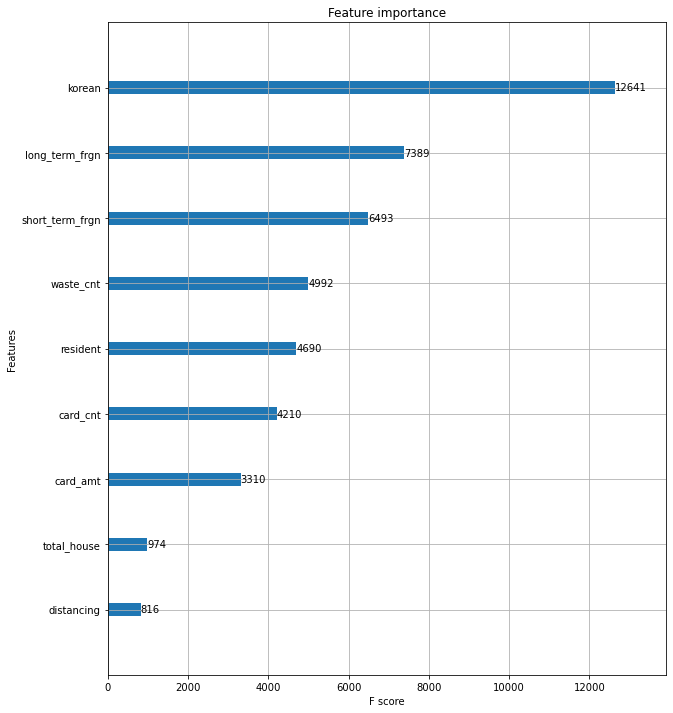

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)